# Задача анализа исходного датасета

## Необходимо проанализировать обезличенные HR данные о сотрудниках на предмет важных закономерностей, которые могут принести компании пользу. Раскрыть факторы, которые приводят к «истощению сотрудников» (Employee Attrition).

*В качестве начальных данных имеется dataset в виде excel-файла Company_HR_Employees. Для начала импортируем необходимые библиотеки для обработки информации, ее анализа и представления в виде графических зависимостей.*

In [1]:
# библиотеки для анализа информации
import pandas as pd
import numpy as np

# библиотеки для графического представления зависимостей
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Считывание и первичный анализ dataset

In [2]:
data = pd.read_excel('Company_HR_Employees.xlsx', sheet_name=0)

*Посмотрим количество столбцов и их наименование.* 

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,2068,2,...,1,80,0,6,3,4,4,3,1,2
1,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,4,80,0,17,3,2,9,6,0,8
2,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,2,80,1,6,0,3,6,2,0,3
3,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,1,80,1,9,5,3,7,7,1,7
4,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,80,1,17,3,3,5,2,0,3


*Проверяем наш dataset на пропуски в столбцах.*

In [4]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

*Также можно вывести общие краткие сведения о таблице.*

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

*Проверим также численные значения в столбцах на их адекватность.*

In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


*Также для быстрой сводки по столбцам можем воспользоваться библиотекой __`pandas_profiling`__, которая позволяет автоматизировать первичный анализ и, тем самым, значительно его упростить и ускорить.*

In [7]:
# import pandas_profiling
# pandas_profiling.ProfileReport(data)

*Далее можно перейти непосредственно к решению поставленной задачи. Заметим, что в исходной таблице имеется столбец "Attrition", по которому и будем проводить анализ.*

### 2. Анализ основных факторов, влияющих на "выгорание" сотрудников

#### 2.1 Общий анализ

*Проведем анализ влияния различных факторов на "выгорание". Для этого рассмотрим несколько предполагаемых основных критериев, оказывающих наибольшее влиянее. Анализ зависимостей будет произведен графически, засчет построения графиков при использовании библиотек __`seaborn`__ и __`pyplot`__. Начнем с базового анализа соотношения количества людей подверженных и неподверженных "выгоранию" и построим столбчатую диаграмму.*

In [8]:
sns.set_theme(style='darkgrid', palette='Set2')

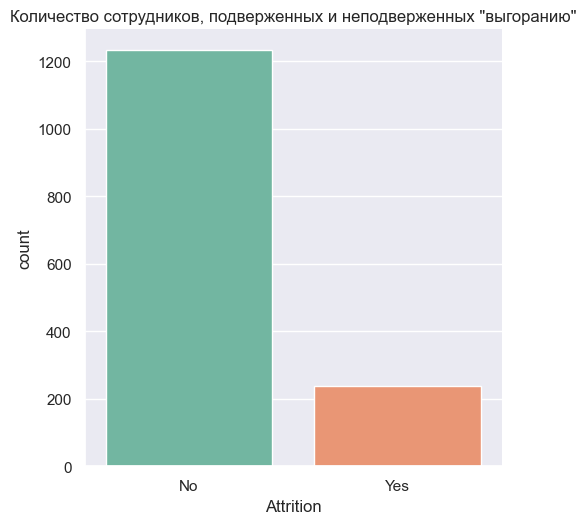

In [9]:
sns.catplot(x='Attrition', kind='count', data=data)
plt.title('Количество сотрудников, подверженных и неподверженных "выгоранию"');

#### 2.2 Анализ по подразделениям

*Рассмотрим распределение сотрудников по отделам. Воспользуемся также столбчатой диаграммой.*

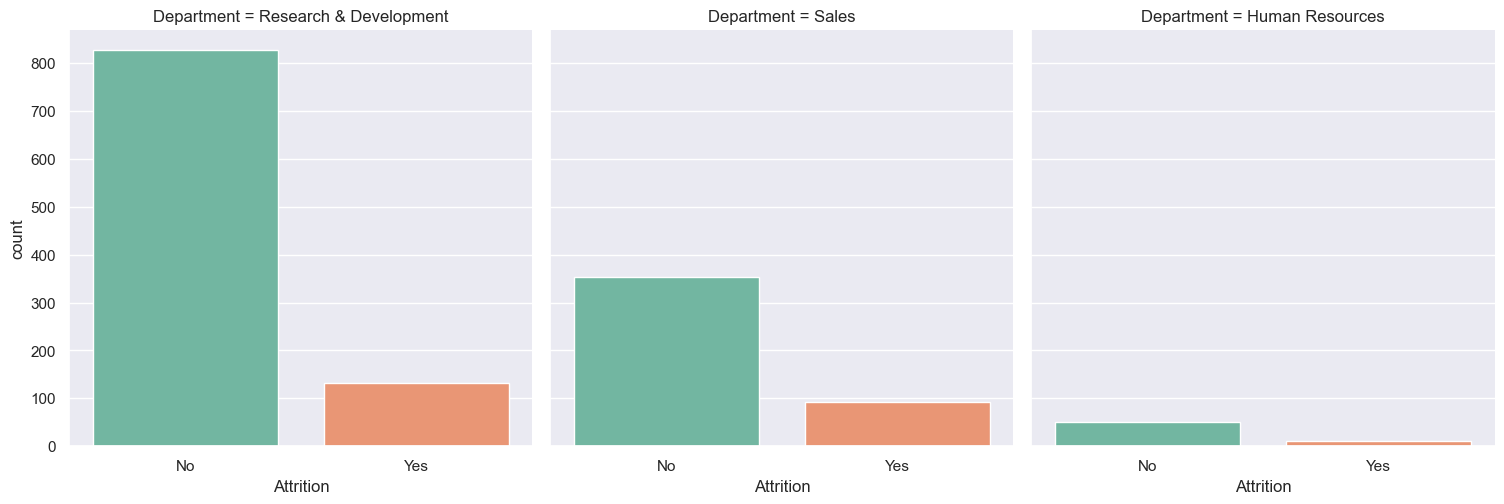

In [10]:
sns.catplot(x='Attrition', col='Department', data=data, kind='count');

*На основе полученных графиков можно сделать вывод, что по соотношению численности людей, подверженных "выгоранию", в каждом отдельном подразделении к полной численности подразделения выделяется отдел продаж (Sales Department). В их отделе сотрудники сталкиваются с данной проблемой чаще, чем в других подразделениях.*

#### 2.3 Анализ по заработной плате

*Перейдем непосредственно к анализу самих факторов. Для начала рассмотрим вляиние месячных зарплат всех сотрудников и почасовую ставку. Для этого воспользуемся графиками типа boxplot.*

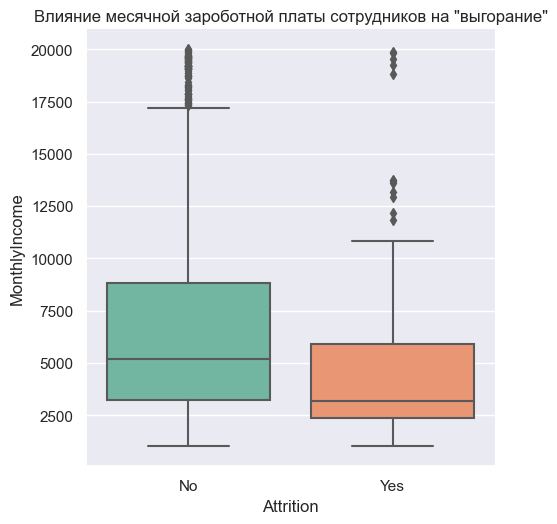

In [11]:
sns.catplot(x='Attrition', y='MonthlyIncome', kind='box', data=data)
plt.title('Влияние месячной зароботной платы сотрудников на "выгорание"');

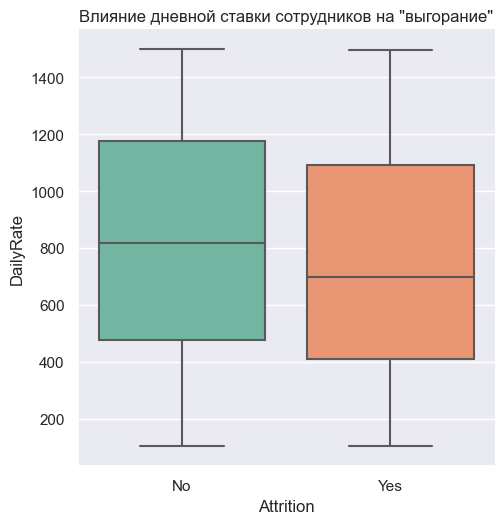

In [12]:
sns.catplot(x='Attrition', y='DailyRate', kind='box', data=data)
plt.title('Влияние дневной ставки сотрудников на "выгорание"');

*Из данного графика видно, что люди, получающие меньшую месячную заработную плату и дневную ставку, больше подвержены "выгоранию".*

#### 2.4 Анализ по "переработке"

*Другим важнейшим фактором является так называемая "переработка" сотрудником установленных законодательством рабочих часов. Для анализа этого фактора воспользуемся столбчатой диаграммой. Также построим зависимость времени, отработанного в компании, от времени необходимого для повышения, в качестве дополнительного критерия рассмотрим "переработку".*

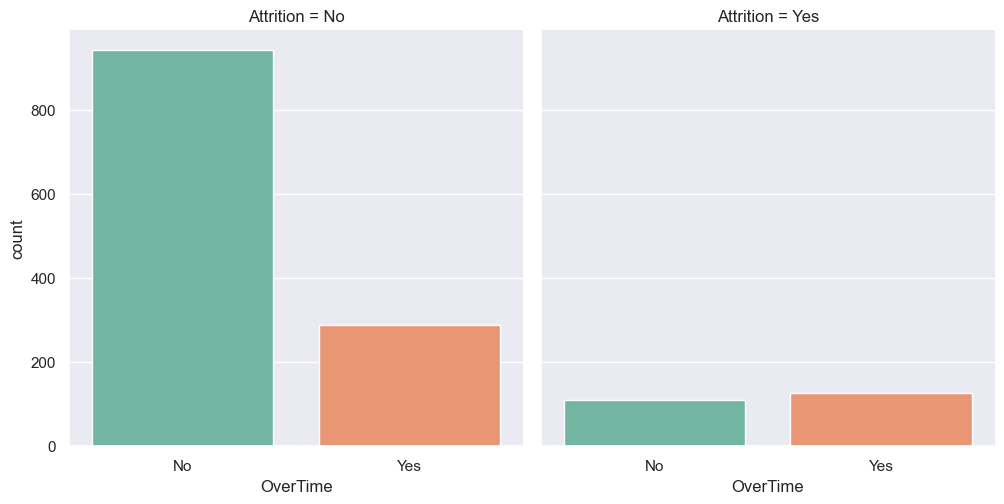

In [13]:
sns.catplot(x='OverTime', col='Attrition', data=data, kind='count');

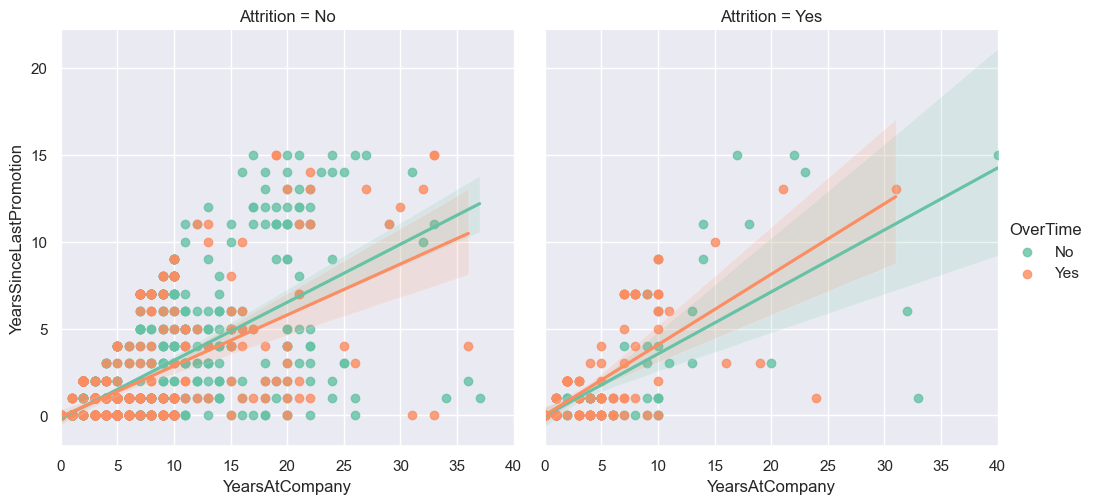

In [14]:
sns.lmplot(x='YearsAtCompany', y='YearsSinceLastPromotion', col='Attrition', hue='OverTime', data=data);

*Из полученных графиков можно сделать вывод, что сотрудники, которые "перерабатывают" и не имеют "выгорания" получают повышение быстрее, чем другие. Однако, в категории людей, имеющих "выгорание", большее количество людей, которые "перерабатывают", достигают повышения позже. Это может служить предлогом для увольнения сотрудников, поскольку за их усердную работу люди не вознаграждаются должным образом и, вследствие этого, теряют интерес к работе.*

#### 2.5 Анализ по дистанции от работы и частоте командировок

*Рассмотрим также зависимость дистанции от дома каждого сотрудника до работы на "выгорание", поскольку это может непосредственно влиять на время, которое человек тратит на дорогу ежедневно, и, соответственно, на его настрой в начале рабочего дня и удовлетворенность от самого рабочего процесса. Для этого воспользуемся графиком типа boxplot.*

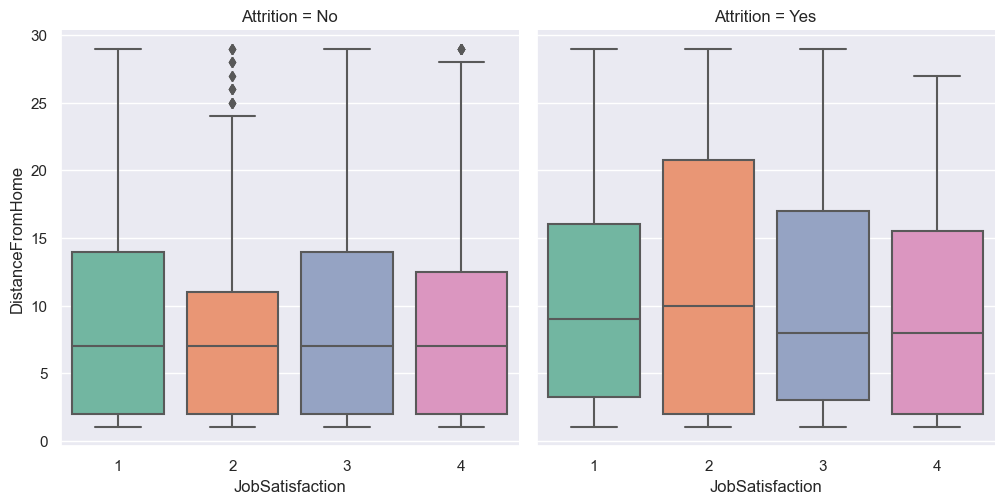

In [15]:
sns.catplot(x='JobSatisfaction', y='DistanceFromHome', col='Attrition', data=data, kind='box');

*Можно заметить, что "выгорание" чаще встречается у людей, которые живут дальше от работы, при этом их менее устраивает их рабочая деятельность.*

*Помимо этого, влияние на "выгорание" сотрудников может оказывать необходимость ездить в командировки. Воспользуемся столбчатой диаграммой для анализа.*

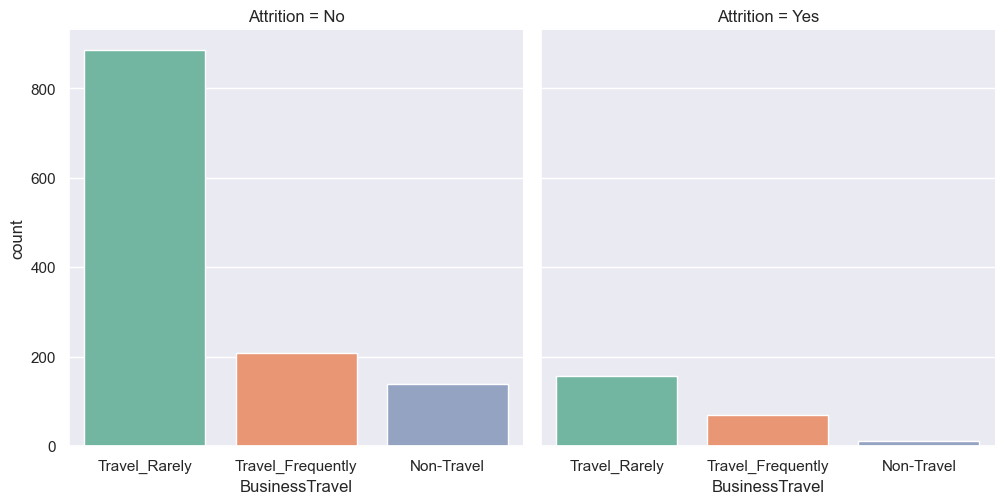

In [16]:
sns.catplot(x='BusinessTravel', col='Attrition', data=data, kind='count');

*Судя по анализу групп по необходимости отправления в командировки, чаще подвержены "выгоранию" оказываются люди из второй группы, т.е. сотрудники, которым часто приходится отправляться в поездки по рабочим вопросам.*

#### 2.6 Анализ по "семейному положению"

*Стоит также рассмотреть влияние "семейного положения" на подверженность "выгоранию".*

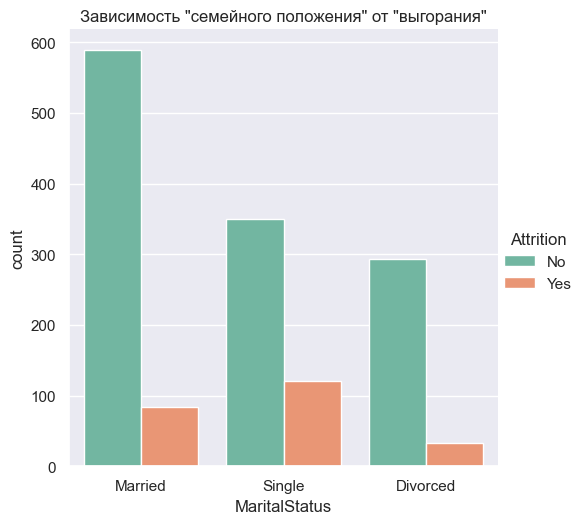

In [17]:
sns.catplot(x='MaritalStatus', hue='Attrition', data=data, kind='count')
plt.title('Зависимость "семейного положения" от "выгорания"');

*Нетрудно заметить, что чаще этому влиянию чаще оказываются подвержены одинокие люди.*

#### 2.7 Анализ по уровню полученного образования

*Образование тоже может оказывать влияние на "выгорание". Уровни обозначены цифрами, где 1 – "below colledge", 2 – "college", 3 – "bachelor", 4 - "master", 5 – "doctor". Построим столбчатую диаграмму и рассмотрим его влияние.*

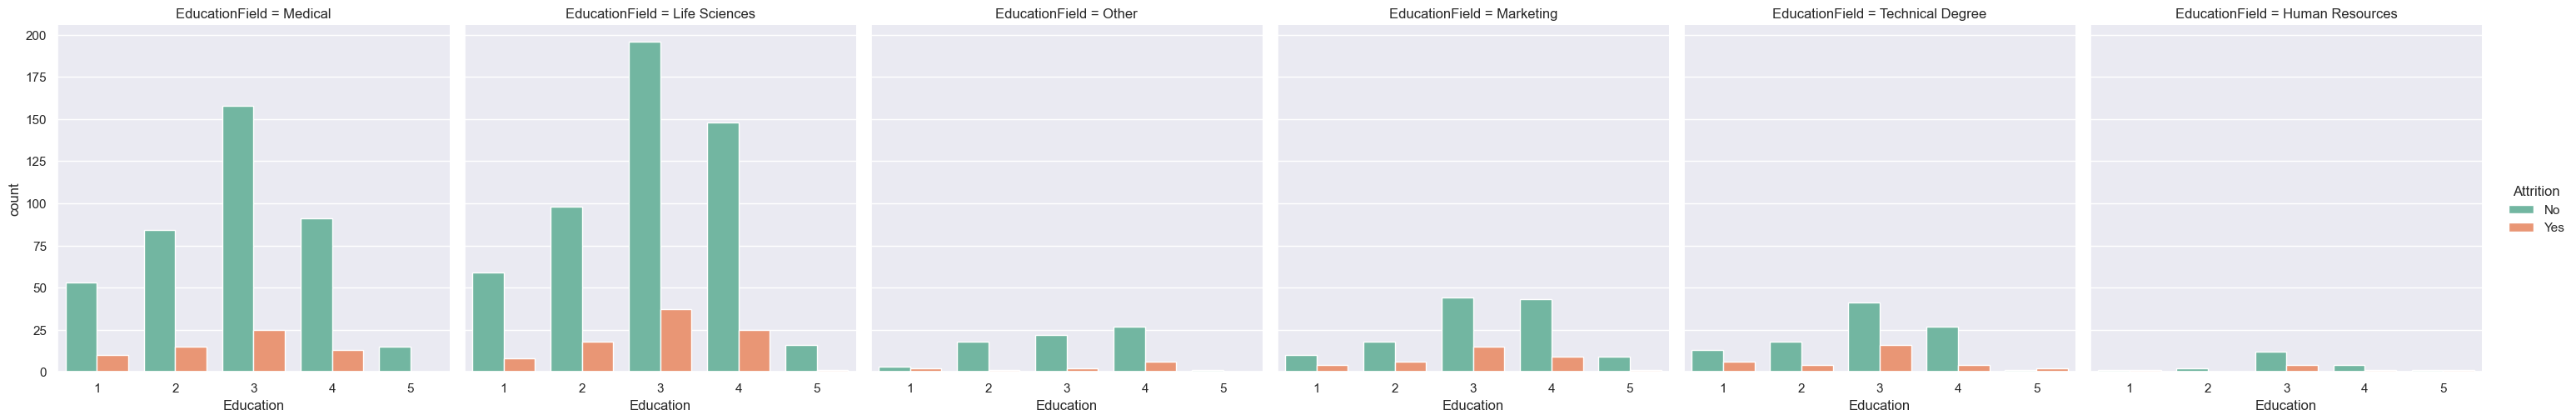

In [18]:
sns.catplot(x='Education', col='EducationField', hue='Attrition', data=data, kind='count');

*Среди всех работников, подверженных "выгоранию", наибольшую часть составляют бакалавры и магистры (уровень 3 и 4 соответственно) в медицинской области и области естественных наук.*

#### 2.8 Анализ по рабочему опыту

*Рассмотрим влияние количества рабочего опыта. Для начала построим зависимость количества проработанного времени на текущей должности от "выгорания", воспользуемся графиком типа "boxplot".*

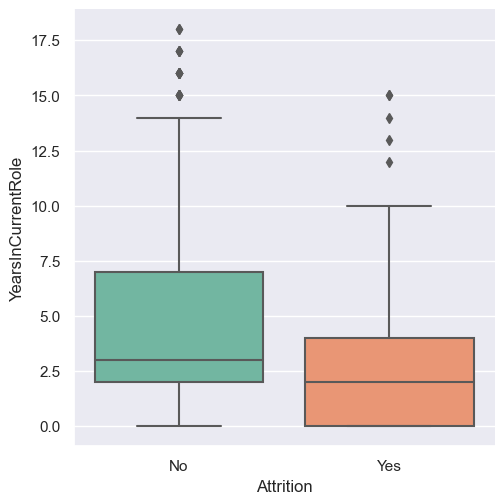

In [19]:
sns.catplot(x='Attrition', y='YearsInCurrentRole', kind='box', data=data);

*Из графика видно, что сотрудники, проработавшие меньшее количество времени в одной должности чаще подвергаются "выгоранию".*

*Дополнительно рассмотрим зависимость количества проработанного времени в данной компании от "выгорания".*

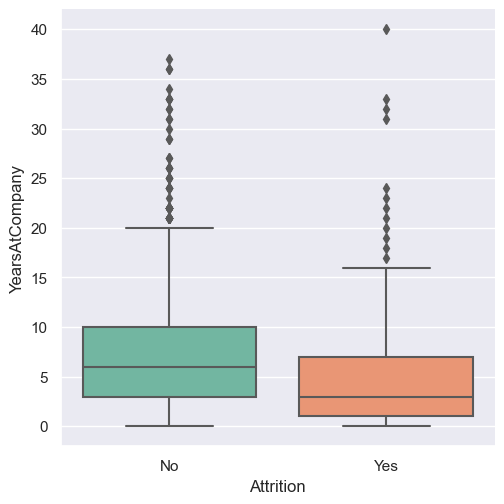

In [20]:
sns.catplot(x='Attrition', y='YearsAtCompany', kind='box', data=data);

*Из полученного графика следует, что люди, проработавшие меньше времени в компании чаще подвергаются "выгоранию".*

#### 2.9 Анализ по уровню вовлеченности в рабочий процесс и удовлетворенности от выполнения определенного типа работ

*Не стоит также забывать, что чем больше человек погружен в рабочий процесс и чем больше удовольствия он ему приносит, тем лучше его результативность при выполнении поставленных задач. Поэтому стоит также рассмотреть влияние этих факторов на "выгорание". Для начала графически построим зависимость вовлеченности в рабочей процесс от "выгорания".*

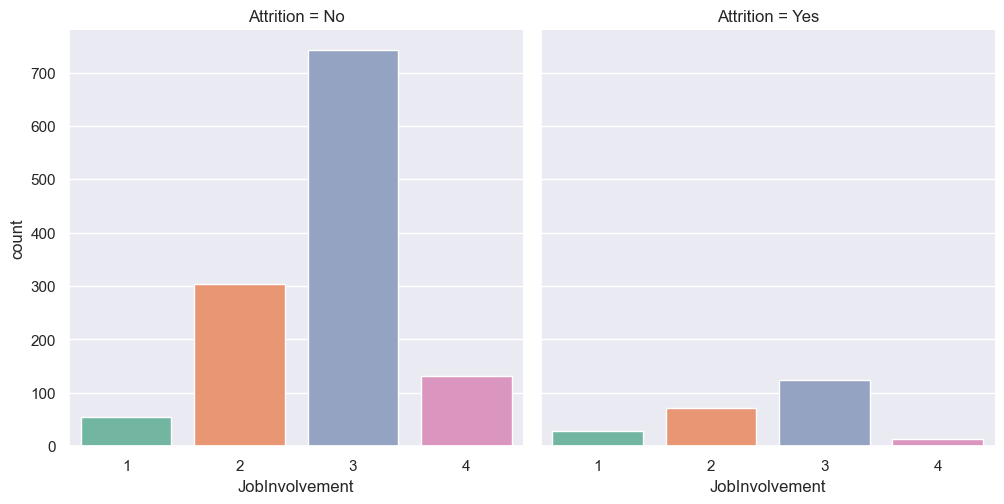

In [21]:
sns.catplot(x='JobInvolvement', col='Attrition', kind='count', data=data);

*Нетрудно заметить, что "выгоранию" чаще остальных оказываются подвержены люди, которые в целом достаточно вовлечены в рабочий процесс.*

*Дополнительно рассмотрим зависимость "выгорания" от уровня удовлетворенности рабочим процессом.*

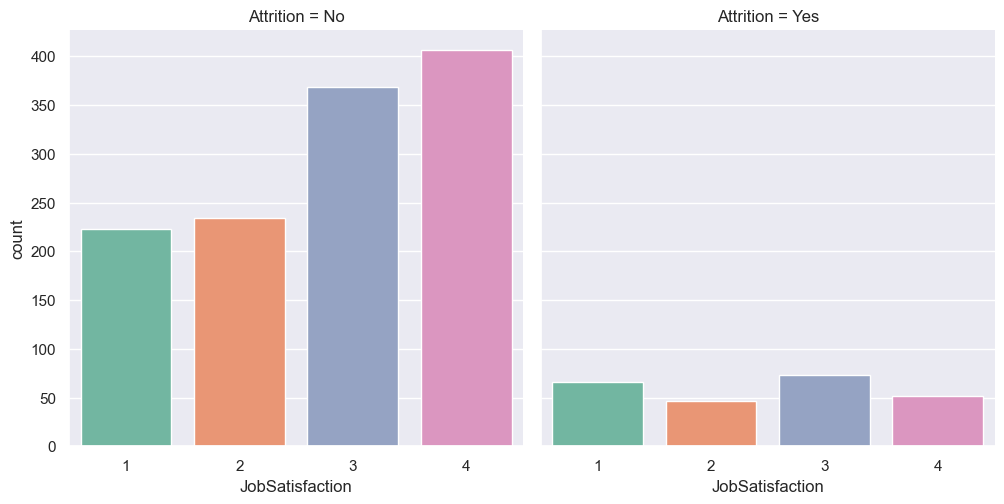

In [22]:
sns.catplot(x='JobSatisfaction', col='Attrition', kind='count', data=data);

*Сотрудники имеющие "выгорание" зачастую не получают удовольствие от рабочего процесса, хотя конкретной зависимости в этом не наблюдается.*

### Вывод

*После рассмотрения основных факторов, влияющих на "выгорание" сотрудников данной компании были выявлены некоторые закономерности. Среди рассмотренных подразделений чаще всего данному влиянию оказываются подвержены сотрудники отдела продаж (Sales Department), а также получившие образование бакалавра или магистра по специальностям медицина и естественные науки.*

Также выделим факторы, вызывающие "выгорание" у сотрудников и полученные на основе проведенного анализа:
- маленькая месячная заработная плата;
- наличие "переработки" у сотрудников и несвоевременное повышение в должности;
- довольно частые командировки;
- большое расстояние между домом и работой;
- маленькая удовлетворенность рабочим процессом.